In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import colorcet as cc
import torchvision

from utils import load_image, show_mask, make_grayscale, make_black_white
from vanilla_gradient import VanillaGradient
from guided_backprop import GuidedBackprop
from integrated_gradients import IntegratedGradients

In [2]:
model = torchvision.models.resnet50(pretrained=True)
image = load_image('images/doberman.png', size=224)

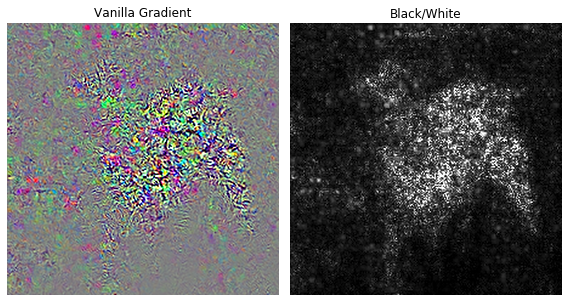

In [6]:
vanilla_gradient = VanillaGradient(model)
rgb_mask = vanilla_gradient.get_mask(image)

bw_mask = make_black_white(rgb_mask)

figure, axes = plt.subplots(1, 2, figsize=(8, 8), tight_layout=True)
show_mask(rgb_mask, title='Vanilla Gradient', axis=axes[0])
show_mask(bw_mask, title='Black/White', cmap=cc.cm.gray, axis=axes[1])

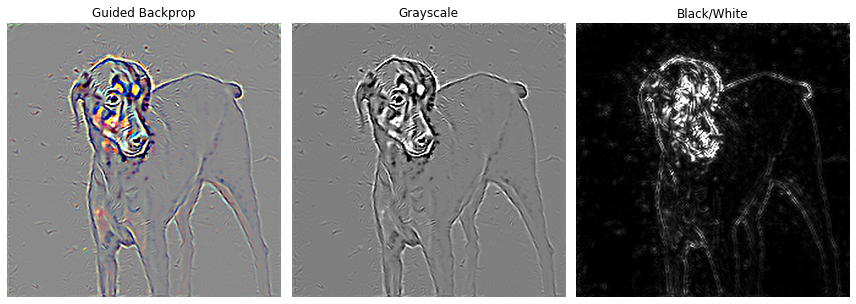

In [5]:
guided_backprop = GuidedBackprop(model)
rgb_mask = guided_backprop.get_mask(image)
guided_backprop.remove_hooks()

gray_mask = make_grayscale(rgb_mask)
bw_mask = make_black_white(rgb_mask)

figure, axes = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True)
show_mask(rgb_mask, title='Guided Backprop', axis=axes[0])
show_mask(gray_mask, title='Grayscale', cmap=cc.cm.gray, axis=axes[1])
show_mask(bw_mask, title='Black/White', cmap=cc.cm.gray, axis=axes[2])

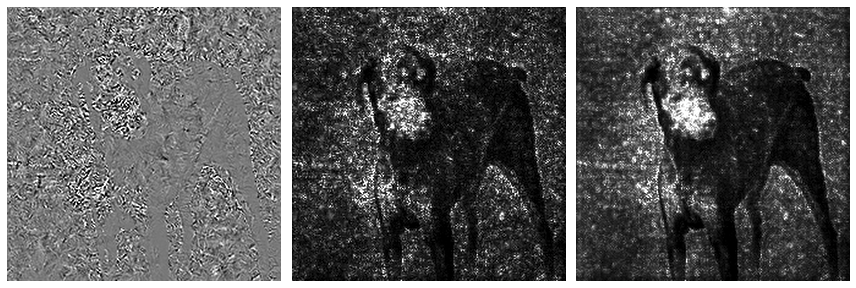

In [20]:
integrated_gradients = IntegratedGradients(model)
rgb_mask = integrated_gradients.get_mask(image)
abs_rgb_mask = integrated_gradients.get_mask(image, process=np.abs)

gray_mask = make_grayscale(rgb_mask)
bw_mask = make_black_white(rgb_mask)
bw_mask_alt = make_black_white(abs_rgb_mask)

figure, axes = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True)
show_mask(gray_mask, title='Integrated Gradients', cmap=cc.cm.gray, axis=axes[0])
show_mask(bw_mask, title='Black/White', cmap=cc.cm.gray, axis=axes[1])
show_mask(bw_mask_alt, title='Processed', cmap=cc.cm.gray, axis=axes[2])